### ДЗ-2
Используя файл Lesson_2_extended.ipynb (он в web2.zip в материалах)::

Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.
Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.
* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
* Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [166]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Задание 1

Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод. 

Задача: предсказание баллов ЕГЭ ученика

In [167]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [168]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Стандартизация

3.0


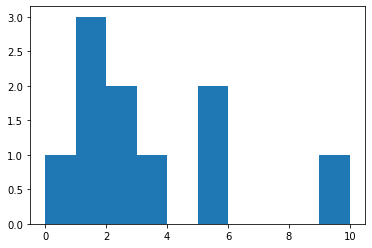

In [169]:
print(np.mean(X[:, 1]))
plt.hist(X[:, 1])
plt.show()

975.0


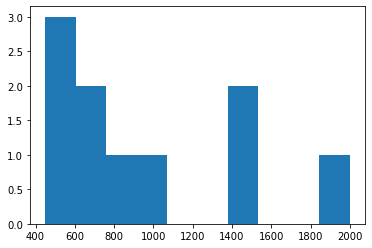

In [170]:
print(np.mean(X[:, 2]))
plt.hist(X[:, 2])
plt.show()

In [171]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [172]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

4.4408920985006264e-17
1.0


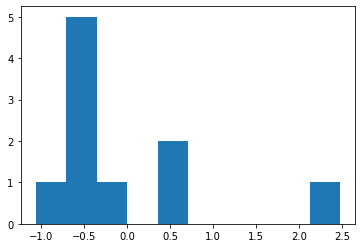

In [173]:
print(np.mean(X_st[:, 1]))
print(np.std(X_st[:, 1]))

plt.hist(X_st[:, 1])
plt.show()

-4.163336342344337e-17
0.9999999999999999


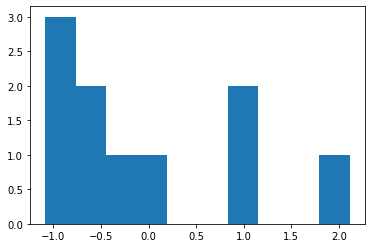

In [174]:
print(np.mean(X_st[:, 2]))
print(np.std(X_st[:, 2]))

plt.hist(X_st[:, 2])
plt.show()

In [175]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [176]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [177]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [ 2.10710624 -0.01924232  0.62839235 -0.59455347], error 3255.8367719518433
Iter: 500, weights: [56.49494498  5.8757728   1.38038514  5.20209702], error 25.426262549092478
Iter: 1000, weights: [56.49717505  6.17107577  0.262751    6.0637994 ], error 24.97212360068611
Iter: 1500, weights: [56.49717514  6.25625504 -0.13271535  6.38710605], error 24.913463381169016
Iter: 2000, weights: [56.49717514  6.28582223 -0.27465052  6.50409943], error 24.905807459636844
Iter: 2500, weights: [56.49717514  6.29640428 -0.32569599  6.5462239 ], error 24.904793380030508
Iter: 3000, weights: [56.49717514  6.30020847 -0.34405929  6.56138043], error 24.904653785827648
Iter: 3500, weights: [56.49717514  6.30157693 -0.35066565  6.56683325], error 24.904632716600382
Iter: 4000, weights: [56.49717514  6.30206924 -0.35304236  6.56879497], error 24.904628909713114
Iter: 4500, weights: [56.49717514  6.30224635 -0.35389741  6.56950072], error 24.904628028475468
Final MSE: 24.904627774644307


array([56.49717514,  6.30231   , -0.35420466,  6.56975433])

In [178]:
gradient_descent(X_st, y, iterations=5000, eta=1e-1)

Iter: 0, weights: [11.35274275  2.35712993  0.22078682  3.677522  ], error 3352.490179245433
Iter: 500, weights: [56.5         6.30307841 -0.35631603  6.57141632], error 24.904618877880964
Iter: 1000, weights: [56.5         6.30309349 -0.35638885  6.57147642], error 24.90461887690838
Iter: 1500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908394
Iter: 2000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908387
Iter: 2500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908387
Iter: 3000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908387
Iter: 3500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908387
Iter: 4000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908387
Iter: 4500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908387
Final MSE для градиентного спуска: 2

array([56.5       ,  6.30309349, -0.35638885,  6.57147643])

In [179]:
lambda_l = np.array([0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [180]:
lambda_l


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

не получилось дальше сделать(

### Задание 2

Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации

In [181]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [182]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [ 0.56394525  0.04572199 -0.81827318  0.8935453 ], error 3429.6455419155973
Iter: 500, weights: [56.49270549  5.9754295   0.82226086  5.67248466], error 25.14316019544072
Iter: 1000, weights: [56.49499991  6.21010808  0.05893229  6.22958202], error 24.935225312097906
Iter: 1500, weights: [56.495       6.25721756 -0.17149236  6.42429555], error 24.910594573146415
Iter: 2000, weights: [56.495       6.27352944 -0.25169538  6.49078169], error 24.90653980121098
Iter: 2500, weights: [56.495       6.27950028 -0.28059504  6.51464997], error 24.90563750267899
Iter: 3000, weights: [56.495       6.28165452 -0.29099883  6.52323794], error 24.90538496655406
Iter: 3500, weights: [56.495       6.28243018 -0.29474367  6.52632894], error 24.905303430127134
Iter: 4000, weights: [56.495       6.28270939 -0.29609159  6.52744151], error 24.90527529481659
Iter: 4500, weights: [56.495       6.28280989 -0.29657677  6.52784197], error 24.905265324914893
Final MSE: 24.905261756695364


array([56.495     ,  6.28284602, -0.2967512 ,  6.52798595])

### Задание 4
Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [183]:
# сгенерируем набор данных
X, Y, coef = datasets.make_regression(n_samples=5000, n_features=100, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X[:, 0] *= 10
display(X, Y, coef)

array([[  1.3247357 ,  -0.55971651,   0.09736053, ...,  -0.08863154,
         -1.28527425,   1.11916264],
       [ -9.69176722,   0.93792133,   1.47647697, ...,   0.50135174,
          0.30553452,   0.38119272],
       [  7.53372963,   0.23571252,  -0.26826301, ...,   0.13429511,
          0.39268725,  -1.705604  ],
       ...,
       [ -6.02468031,  -0.41352677,  -0.58226656, ...,   1.7385905 ,
         -0.92126527,   0.07669434],
       [  2.72152799,   0.31368421,  -0.95486047, ...,   0.61463174,
         -0.19846593,   0.71522738],
       [-12.27040856,   0.72881587,   0.69923581, ...,  -1.00273384,
          0.25943566,  -0.73527752]])

array([-47.71337558,  28.90108667, -79.2179893 , ..., 113.50426296,
       -28.63851621, -98.55203852])

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       21.15788317,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 63.73786503,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

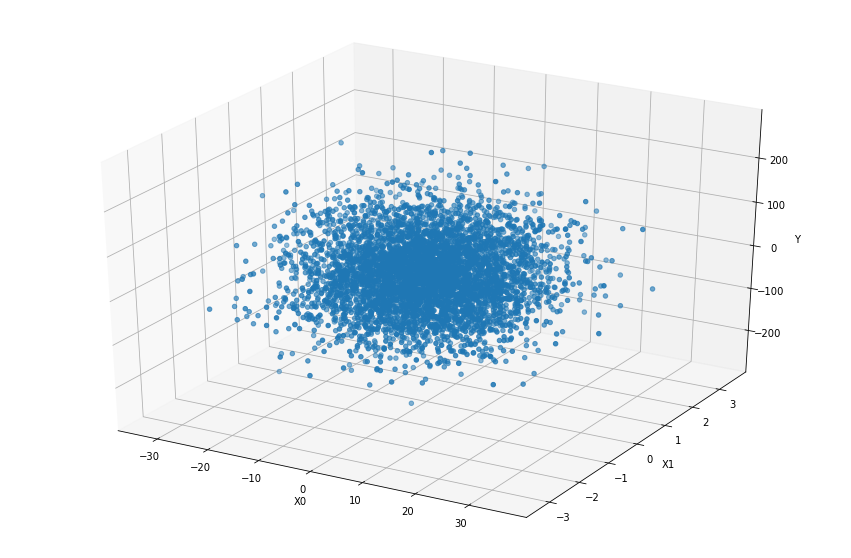

In [184]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

Отмасштабируем получившиеся признаки методом стандартизации.

In [185]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
display(means, stds)

array([ 0.01184348, -0.02605135,  0.00356367, -0.01330518,  0.00851653,
       -0.01024043, -0.01421563, -0.00178173,  0.0146402 , -0.0103288 ,
       -0.02022778,  0.00076998,  0.00226863, -0.01230185, -0.01354234,
        0.00092571,  0.0050383 ,  0.00854957,  0.0071229 , -0.01262211,
       -0.0022767 , -0.00616268,  0.00330448, -0.00062033,  0.00622673,
       -0.02419821, -0.00325302, -0.01652865,  0.00261688,  0.01548562,
        0.01083549,  0.00161181, -0.02199562, -0.00232257, -0.00214787,
       -0.02399804,  0.00880488, -0.0299673 ,  0.01071415,  0.01634175,
       -0.0074446 ,  0.01137557, -0.00349249,  0.02056331,  0.02187864,
        0.03103652, -0.02811864, -0.01680345, -0.01322751, -0.00487419,
        0.00624092, -0.0069488 , -0.01997877,  0.00100205,  0.00988697,
        0.01595287, -0.01838907,  0.0124511 ,  0.00811494, -0.00269723,
        0.00489925, -0.01513336, -0.00872224,  0.01475057, -0.02897376,
       -0.00527797, -0.01303961, -0.00804584, -0.01999373, -0.01

array([9.90219944, 1.00392054, 1.00018383, 0.99310278, 1.03031642,
       0.99581371, 0.99128357, 0.99104272, 0.9885918 , 0.97660218,
       1.02403272, 0.99776586, 0.99520932, 1.0151644 , 0.98940403,
       0.99665837, 0.99088405, 0.99498255, 1.00991523, 0.99694929,
       0.99979512, 1.00668561, 1.01951   , 0.98132551, 1.00312428,
       1.01520568, 0.98132719, 0.99230751, 1.00355079, 0.99585427,
       0.99282834, 1.00980728, 1.00670341, 1.02048176, 1.01459201,
       0.98421392, 0.98140167, 1.00067812, 1.00316761, 1.00519005,
       1.00504042, 0.99207866, 0.99967947, 0.99525704, 1.00811052,
       0.98699505, 0.99850202, 1.00430818, 0.99778755, 0.99344343,
       0.99084405, 1.00636435, 0.99351755, 0.99439928, 0.98694284,
       0.9842618 , 1.00997158, 0.9847765 , 0.98447341, 0.99870242,
       1.01655945, 1.00549535, 1.00972552, 0.97925523, 0.98414134,
       0.99349071, 1.01409921, 0.98996412, 0.99442927, 0.99233145,
       0.96864432, 0.99476988, 0.99683716, 0.99178564, 1.00506

In [186]:
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j]

In [187]:
X

array([[ 0.13258592, -0.53158107,  0.09377962, ..., -0.08983767,
        -1.26580454,  1.12990883],
       [-0.97994499,  0.96020814,  1.47264259, ...,  0.49758659,
         0.30416516,  0.38755123],
       [ 0.75961772,  0.26074162, -0.27177672, ...,  0.13212204,
         0.39017621, -1.71165275],
       ...,
       [-0.60961444, -0.38596224, -0.58572256, ...,  1.72945891,
        -0.90656396,  0.08124242],
       [ 0.27364471,  0.33840881, -0.95824799, ...,  0.61037525,
        -0.19323305,  0.72357192],
       [-1.24035595,  0.75191928,  0.69554428, ..., -0.99997512,
         0.25867018, -0.7355571 ]])

In [188]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

display(means, stds)

array([ 6.26609875e-17,  1.27675648e-17,  2.28705943e-17,  3.77475828e-17,
       -9.59787805e-18, -2.18047802e-17,  2.54463117e-17, -1.46105350e-17,
       -7.78932474e-17,  2.82163182e-17, -1.49213975e-17, -4.47836213e-17,
        1.11022302e-17,  8.04689648e-17, -3.57047725e-17,  1.00308650e-17,
        5.61328761e-17,  3.43725048e-17, -6.19504448e-18,  1.84297022e-17,
       -1.22124533e-17, -5.77760062e-17,  5.35294031e-17, -3.13180037e-17,
       -5.44009282e-18, -4.20108393e-17, -1.07025500e-17,  9.50350909e-18,
       -1.06803455e-17,  2.53130850e-18,  4.65183447e-17,  1.71196390e-17,
        2.72726286e-17,  3.77475828e-18, -8.65973959e-18, -2.80775403e-17,
        7.97584221e-17,  2.33590924e-17,  4.96047647e-17, -4.62074823e-17,
       -4.86721774e-17,  2.79887225e-17,  4.20163904e-17,  1.26224031e-16,
        2.38697950e-18, -4.11559675e-17,  1.21436194e-16,  9.68114477e-18,
       -5.12673237e-17,  2.30926389e-18,  7.07767178e-18, -2.43360887e-17,
        1.04249942e-17,  

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [189]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err


### Реализуем стохастический градиентный спуск


In [193]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, Y, iterations, eta=1e-3, size=1):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        train_ind = np.random.randint(X.shape[0], size=size)

        y_pred = np.dot(X[train_ind], W)
        W = W - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        error = calc_mse(Y, np.dot(X, W))
        errors.append(error)
        w_list.append(W)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {error}')
    
    print(f'Final MSE для стохастического градиентного спуска: {calc_mse(Y, np.dot(X, W))}')
    return W

In [194]:
%%time
stohastic_gradient_descent(X, Y, iterations=10000, eta=1e-3)


Iter: 0, error 4674.332379271776
Iter: 1000, error 165.10572003623332
Iter: 2000, error 32.82835231613442
Iter: 3000, error 26.622850168635313
Iter: 4000, error 25.741555774196396
Iter: 5000, error 26.427047292040196
Iter: 6000, error 26.226809042549103
Iter: 7000, error 26.62546417556834
Iter: 8000, error 26.81065617006646
Iter: 9000, error 26.584369762109457
Final MSE для стохастического градиентного спуска: 26.135898290728925
Wall time: 2.92 s


array([-1.24669142e-01,  1.28502183e-01,  2.15251785e-01, -2.00799906e-01,
       -2.60502390e-01,  1.92725714e-01,  2.77209283e-01,  2.14383233e-02,
       -5.06135845e-02, -4.69632532e-02,  6.37380104e-02,  1.88972042e-01,
        2.12986009e-02,  2.36065128e-01, -8.81583267e-02,  1.07701543e-01,
        1.15165242e-01,  9.83502192e-02,  2.94725515e-01,  3.29030962e-01,
        9.72602124e-02, -1.20158182e-01, -1.57117218e-01,  4.28130066e-02,
        4.36193850e-02,  3.11703306e-01, -8.58449648e-02, -6.09376463e-02,
        1.10574756e-03, -2.13735386e-01, -1.56630354e-02, -1.18700394e-01,
        1.81080344e-01, -2.56887706e-02, -5.72537850e-02, -2.26453932e-01,
        1.72469516e-01,  8.21086810e-02, -1.01033284e-01, -1.32955665e-01,
        2.12588084e+01,  1.84588834e-01,  5.14494977e-02,  1.44242818e-01,
       -1.40009593e-01,  1.52740265e-01, -4.88906248e-01, -5.79208397e-02,
        1.06581942e-01,  2.32949760e-01,  7.65677683e-02,  1.10858695e-01,
        2.60220032e-01,  

Text(0, 0.5, 'MSE SGD')

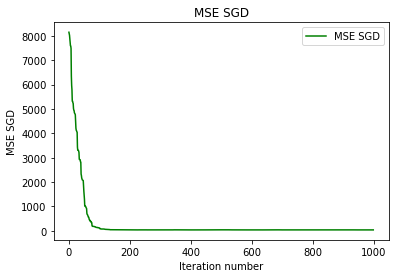

In [195]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors, color="green", label='MSE SGD')
plt.legend(loc='upper right')
plt.title('MSE SGD')
plt.xlabel('Iteration number')
plt.ylabel('MSE SGD')

### Реализуем градиентный спуск

In [196]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [197]:
# классический  GD


def gradient_descent(X, y, iterations, eta=1e-3):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errs = []
    w_list=[W.copy()]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errs.append(err)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        w_list.append(W.copy())
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE для градиентного спуска: {calc_mse(y, np.dot(X, W))}')
    return W



In [198]:
%%time

gradient_descent(X, Y, iterations=10000, eta=1e-3)


Iter: 0, weights: [ 1.22148827e+00  1.56671554e+00 -6.18286949e-01 -3.21027807e-01
  1.61902805e+00  1.43674192e+00 -5.62707299e-01 -1.64135381e+00
  9.33845869e-01  7.62807426e-01  1.50035813e+00 -6.71554631e-01
 -1.41123098e+00 -1.63858440e-01 -2.27676301e-03  1.37856918e+00
 -5.70046014e-01 -1.29736050e-01 -4.62157360e-01 -1.57466866e+00
 -1.18271150e-01 -2.54694243e+00 -4.57625713e-01  6.88540349e-01
  1.10117636e+00 -8.25941040e-01 -2.61523456e-01  6.17328754e-01
  1.39404177e+00  2.12527796e+00 -5.99757899e-01 -2.33613651e-02
 -1.35189585e+00 -1.52629656e+00  2.60328979e+00  1.76897265e-01
 -2.52405960e-01  1.20571809e+00 -6.13626805e-01  6.63891879e-01
 -8.52037156e-01 -4.73547453e-01  2.04690814e-01  9.93380671e-02
 -9.28141541e-01 -1.01626071e+00  7.26978900e-02 -1.40525965e+00
 -9.95447605e-01  1.05685005e+00 -9.92048892e-01  9.69597773e-01
  1.06145151e+00 -2.84500282e-01 -3.90024394e-01 -2.68576288e-01
 -3.17216123e-01  5.58757619e-01 -2.10312974e-01  1.22539677e+00
  1.609

Iter: 5000, weights: [-7.19228599e-03  6.65149665e-02  4.67179570e-02  3.28791566e-02
  5.55368384e-05 -1.46368724e-02  3.13217900e-02  7.65013849e-02
 -2.71208573e-02  1.70812243e-01  8.38554240e-02  7.28240617e-03
  1.49296905e-02  1.57738097e-02  6.02581869e-03  3.05977065e-02
  3.12535178e-02  7.33395602e-02  1.03629730e-01 -1.42517425e-02
  6.31093950e-02  3.21099799e-02 -1.48919065e-01  6.98553325e-02
 -6.23829171e-02  1.81053981e-01  4.40644368e-02  3.47035625e-02
  6.58885608e-02 -6.65220075e-04 -9.55550671e-02 -1.30152546e-02
  4.08082592e-02  5.27193595e-02  6.23929918e-02 -4.62036118e-02
  1.03724326e-01  4.08902914e-03  8.17349193e-02 -4.58808955e-02
  2.12797722e+01 -1.21700612e-01  1.33977507e-01  1.28683327e-02
 -3.01091274e-02 -1.53609160e-01 -1.19702017e-01 -4.60066613e-03
  1.59920298e-01  7.61799425e-02 -6.73407974e-02 -1.06457776e-02
  7.99136142e-02  1.93582161e-02 -5.33778111e-02 -5.69744900e-02
 -3.68320516e-02 -6.11800007e-02  1.59935403e-02  6.36660095e+01
  1.

Final MSE для градиентного спуска: 23.85786477365119
Wall time: 21 s


array([-7.29629062e-03,  6.48785606e-02,  4.63736551e-02,  3.28957482e-02,
        1.41426546e-04, -1.60418902e-02,  3.08376954e-02,  7.68312627e-02,
       -2.88411052e-02,  1.72370299e-01,  8.46025389e-02,  6.92207986e-03,
        1.42264381e-02,  1.42368129e-02,  5.76774344e-03,  2.99765976e-02,
        3.21713690e-02,  7.32996079e-02,  1.03095438e-01, -1.51931760e-02,
        6.35202924e-02,  3.16181876e-02, -1.48223904e-01,  6.97157703e-02,
       -6.27095798e-02,  1.80877328e-01,  4.41397165e-02,  3.48584313e-02,
        6.65610643e-02, -2.38396245e-03, -9.54077545e-02, -1.30438849e-02,
        3.95582899e-02,  5.18466435e-02,  6.31248126e-02, -4.48515789e-02,
        1.03225151e-01,  4.90941746e-03,  8.16260505e-02, -4.50241840e-02,
        2.12807640e+01, -1.22340759e-01,  1.35506987e-01,  1.31776598e-02,
       -2.84173459e-02, -1.54140433e-01, -1.20510453e-01, -4.61290245e-03,
        1.61205695e-01,  7.55154685e-02, -6.70401090e-02, -1.19268953e-02,
        7.92864946e-02,  

Text(0, 0.5, 'MSE GD')

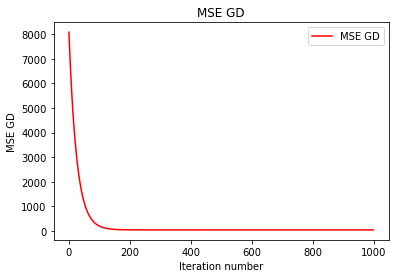

In [199]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errs)), errs, color="red", label='MSE GD')
plt.legend(loc='upper right')
plt.title('MSE GD')
plt.xlabel('Iteration number')
plt.ylabel('MSE GD')

Нанесем среднеквадратичную ошибку для обоих методов на один график

Text(0, 0.5, 'MSE')

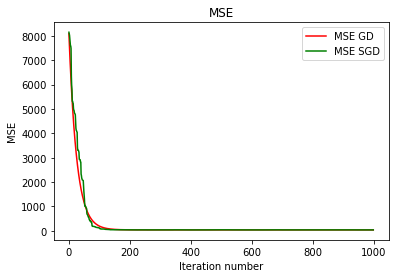

In [200]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errs)), errs, color="red", label='MSE GD')
plt.plot(range(len(errors)), errors, color="green", label='MSE SGD')
plt.legend(loc='upper right')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

В нашем примере графики практически совпали.Градиентный спуск работал намного дольше - 21s, а стохастический - около 3s.